# Chapter 12: Generative Models

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
import numpy as np
import pandas as pd
import os
import time
import matplotlib.pylab as plt
%matplotlib inline

### A simple generative model

In [2]:
df = pd.read_csv('Pearson.txt', sep='\t')

Text(0, 0.5, "Son's height(in)")

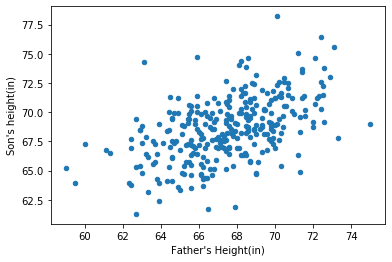

In [3]:
df.sample(300, random_state=2445).plot.scatter(x='Father', y='Son' )
plt.xlabel("Father's Height(in)")
plt.ylabel("Son's height(in)")

In [4]:
sigma = df.cov()
mu = df.mean()

Text(0, 0.5, "Son's height(in)")

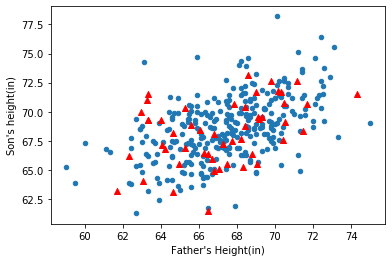

In [5]:
samples = np.random.multivariate_normal(mean=mu, cov=sigma, size=50)
df.sample(300, random_state=2445).plot.scatter(x='Father', y='Son' )
plt.scatter(samples[:, 0], samples[:, 1], marker='^', c='red')
plt.xlabel("Father's Height(in)")
plt.ylabel("Son's height(in)")

### Figure 13.3: A synthetic two dimensional data set

In [6]:
x = np.random.sample([100,2])

In [7]:
import math
pi = math.pi

def PointsInCircum(r,n=500):
    return np.array([(math.cos(2*pi/n*x)*r+np.random.normal(loc=0, scale=0.1),
                      math.sin(2*pi/n*x)*r+np.random.normal(loc=0, scale=0.1)) for x in range(0,n+1)])

In [8]:
samples = PointsInCircum(1)

Text(0, 0.5, 'X2')

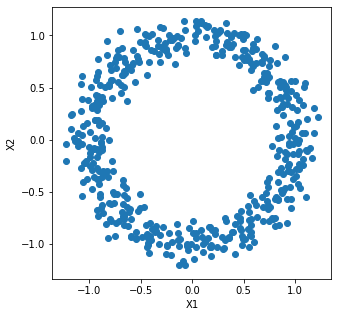

In [9]:
plt.figure(figsize=(5,5))
plt.scatter(samples[:, 0], samples[:, 1])
plt.xlabel('X1')
plt.ylabel('X2')

### KL Loss

In [10]:
import tensorflow as tf

In [11]:
z_mean = tf.random.uniform([1,10])
z_log_var = tf.random.uniform([1,10])
kl_loss = tf.reduce_sum(
    -0.5 * (z_log_var  - tf.exp(z_log_var) - tf.square(z_mean) + 1),
          axis=1)
kl_batch_loss = tf.reduce_mean(kl_loss)
print(kl_batch_loss)

tf.Tensor(3.7357585, shape=(), dtype=float32)


## VAE Model

In [12]:
from tensorflow.keras.datasets import mnist
from vae import *

### encoder

In [13]:
encoder = vae_encoder(2)
encoder.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 14, 14, 32)   320         ['input_2[0][0]']                
                                                                                                  
 leaky_re_lu (LeakyReLU)        (None, 14, 14, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 7, 7, 64)     18496       ['leaky_re_lu[0][0]']            
                                                                                              

### decoder

In [14]:
decoder = vae_decoder(2)
decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_1 (Dense)             (None, 3136)              9408      
                                                                 
 reshape (Reshape)           (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 64)       36928     
 nspose)                                                         
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 32)       18464     
 ranspose)                                                 

### Train VAE

In [15]:
BATCH_SIZE = 128
noise_dim=2
BUFFER_SIZE = 64000
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()
mnist_digits = np.concatenate([x_train, x_test], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(mnist_digits).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [16]:
model = VAEModel(encoder, decoder, noise_dim)

In [17]:
# must run for 100+ epochs for better results
model.train(train_dataset, epochs=1, batch_size=BATCH_SIZE) 

starting epoch 0
Time for epoch 1 is 73.66660118103027 sec, loss 207.9931182861328


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step


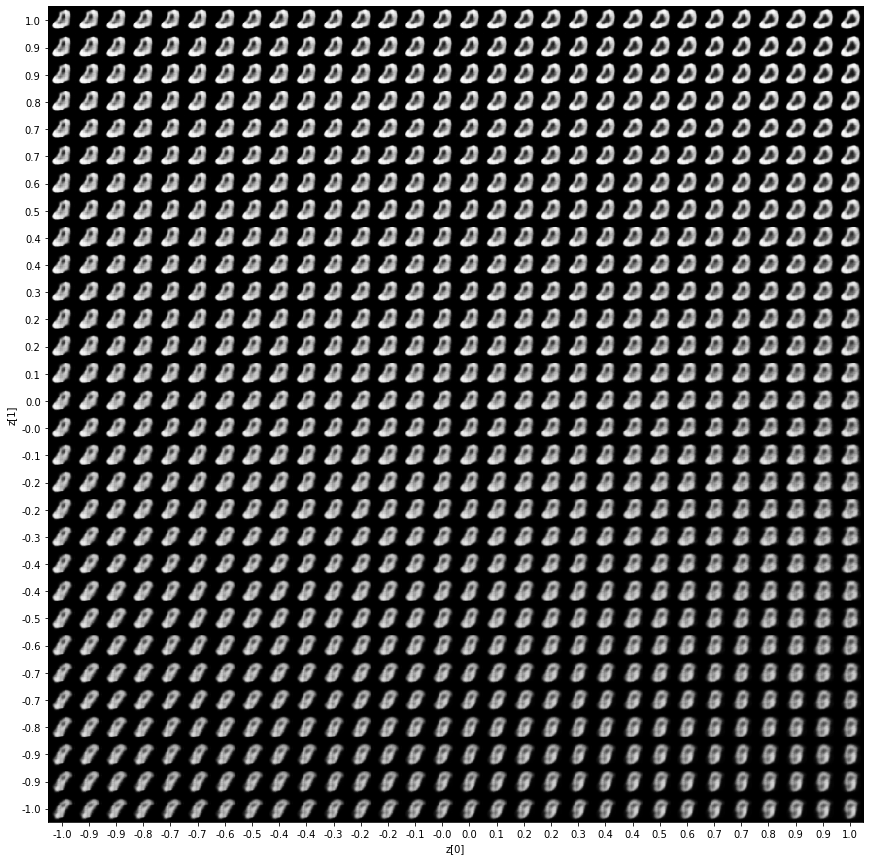

In [18]:
from matplotlib.pylab import plt
model.plot_latent_space()